In [4]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import os
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Fitting Decision Tree classifier to the training set  and testing set
from sklearn.tree import DecisionTreeClassifier 
#Fitting Random Forest to the training set and testing set
from sklearn.ensemble import RandomForestClassifier 
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [5]:
Glass_Data = pd.read_csv('Glass_Identification_Data.csv')
Glass_Data
Glass_Data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
#Getting the information of each feature
Glass_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type Of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
#Checking the null values
Glass_Data.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type Of Glass    0
dtype: int64

In [8]:
Glass_Data.copy()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


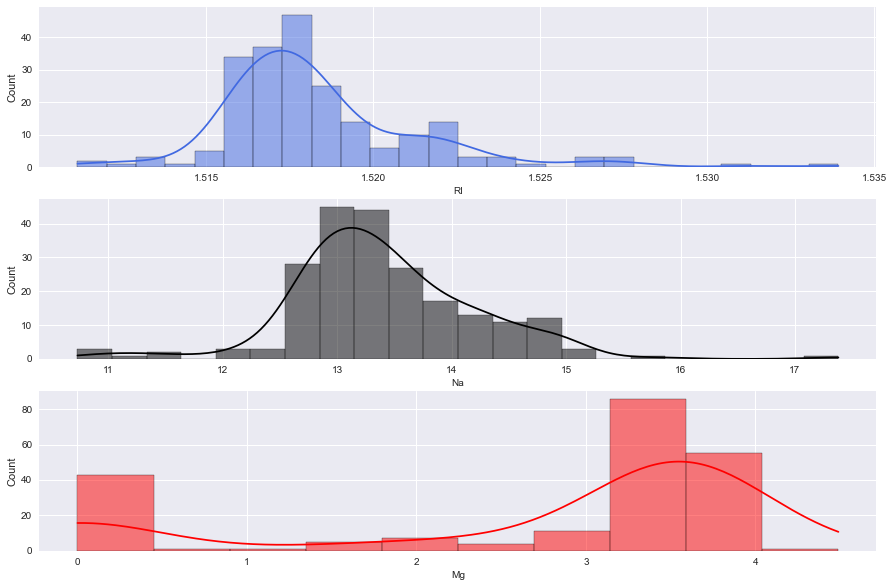

In [9]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,10)) 


sns.histplot(x = Glass_Data["RI"], kde=True, ax=ax[0], color="royalblue");
ax[0].set_xlabel("RI",fontsize=10);

sns.histplot(x = Glass_Data["Na"], kde=True, ax=ax[1], color="black");
ax[1].set_xlabel("Na",fontsize=10);

sns.histplot(x = Glass_Data["Mg"], kde=True, ax=ax[2], color="red");
ax[2].set_xlabel("Mg",fontsize=10);

In [1]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,20)) 

sns.scatterplot(x = Glass_Data['Na'], y = Glass_Data['RI'], hue = Glass_Data['Type of glass'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Sodium (Na)",fontsize=10);

sns.scatterplot(x = Glass_Data['Mg'], y = Glass_Data['RI'], hue = Glass_Data['Type of glass'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Magnesium (Mg)",fontsize=10);

sns.scatterplot(x = Glass_Data['Al'], y = Glass_Data['RI'], hue = Glass_Data['Type of glass'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Aluminum (Al)",fontsize=10);

sns.scatterplot(x = Glass_Data['Fe'], y = Glass_Data['RI'], hue = Glass_Data['Type of glass'], palette='nipy_spectral_r', legend=True, ax=ax[3]);
ax[3].set_xlabel("Iron (Fe)",fontsize=10);

NameError: name 'plt' is not defined

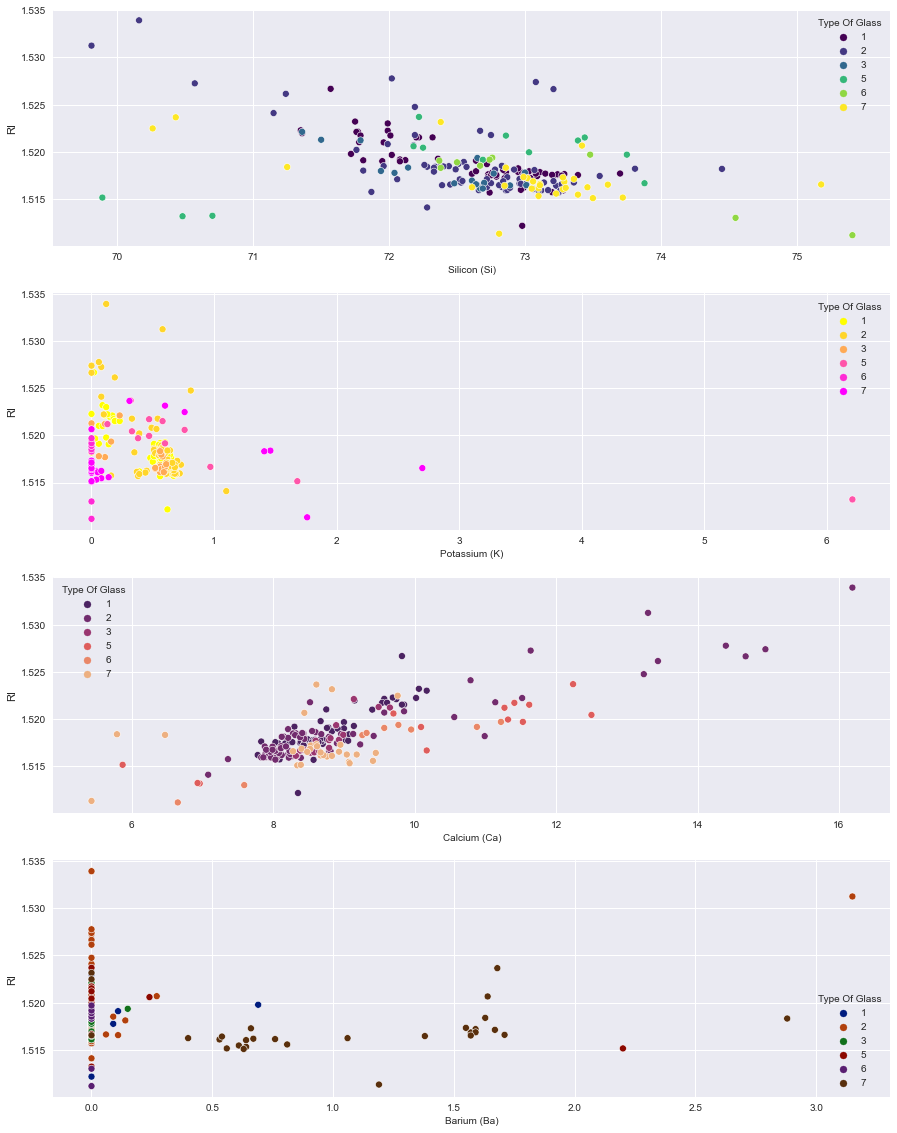

In [11]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,20))

sns.scatterplot(x = Glass_Data['Si'], y = Glass_Data['RI'], hue = Glass_Data['Type Of Glass'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Silicon (Si)",fontsize=10);

sns.scatterplot(x = Glass_Data['K'], y = Glass_Data['RI'], hue = Glass_Data['Type Of Glass'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Potassium (K)",fontsize=10);

sns.scatterplot(x = Glass_Data['Ca'], y = Glass_Data['RI'], hue = Glass_Data['Type Of Glass'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Calcium (Ca)",fontsize=10);

sns.scatterplot(x = Glass_Data['Ba'], y = Glass_Data['RI'], hue = Glass_Data['Type Of Glass'], palette='dark', legend=True, ax=ax[3]);
ax[3].set_xlabel("Barium (Ba)",fontsize=10);

In [12]:
#Creating the variable x and y
x = Glass_Data.iloc[:, :-1]
y = Glass_Data.iloc[:, -1]

In [13]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(171, 10)
(171,)
(43, 10)
(43,)


In [12]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [13]:
#Creating the variable for Knn object
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
classifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = classifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
Glass_Data_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Decision Tree model accuracy(in %) for Training:",Glass_Data_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
Glass_Data_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Descision Tree  model accuracy(in %) for Testing:", Glass_Data_Test)

Decision Tree model accuracy(in %) for Training: 100.0
Descision Tree  model accuracy(in %) for Testing: 95.34883720930233


In [14]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(classifier,X_train,y_train,cv = kfold)
Glass_Data_result = results.mean()*100
print("CV-Accuracy :" , Glass_Data_result)

CV-Accuracy : 98.82352941176471


In [15]:
#Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 9  0  0  0  0  0]
 [ 0 17  2  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.89      0.94        19
           3       0.71      1.00      0.83         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.95        43
   macro avg       0.95      0.98      0.96        43
weighted avg       0.97      0.95      0.96        43

Accuracy: 0.9534883720930233


In [16]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 98.24561403508773
Specificity:  99.12280701754386


In [17]:
#Creating the variable for Knn object
RFClassifier = RandomForestClassifier(n_estimators = 100 ,criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
RFClassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred2 = RFClassifier.predict(X_test)
#Making the prediction on X_train
y_pred3 = RFClassifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
RF_Train = metrics.accuracy_score(y_train, y_pred3)*100
print("Random Forest model accuracy(in %) for Training:",RF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
RF_Test = metrics.accuracy_score(y_test, y_pred2)*100
print("Random Forest model accuracy(in %) for Testing:", RF_Test)

Random Forest model accuracy(in %) for Training: 100.0
Random Forest model accuracy(in %) for Testing: 97.67441860465115


In [18]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results1 = cross_val_score(RFClassifier,X_train,y_train,cv = kfold)
RF_results = results1.mean()*100
print("CV-Accuracy :" , RF_results)

CV-Accuracy : 95.88235294117649


In [22]:
#Comparing the Model 
models =  [('Decision Tree Classification', Glass_Data_Train, Glass_Data_Test),('Random Forest Classification' , RF_Train, RF_Test)]
predict = pd.DataFrame(data = models , columns =['Model', 'Training Accuracy', 'Testing Accuracy'])
predict

,Model,Training Accuracy,Testing Accuracy
0,Decision Tree Classification,100.0,95.348837
1,Random Forest Classification,100.0,97.674419


In [23]:
#Comparing the Model with Cross Validation
models1 =  [('Decision Tree Classification with Cross Validation', Glass_Data_result),('Random Forest Classification with Cross Validation' , RF_results)]
predict1 = pd.DataFrame(data = models1 , columns =['Model', 'Accuracy'])
predict1

,Model,Accuracy
0,Decision Tree Classification with Cross Valida...,98.823529
1,Random Forest Classification with Cross Valida...,95.882353


ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 0.9473684210526316
ROC-AUC for Class 3: 0.9736842105263158
ROC-AUC for Class 4: nan
ROC-AUC for Class 5: 0.47560975609756095
ROC-AUC for Class 6: 0.4268292682926829


C:\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


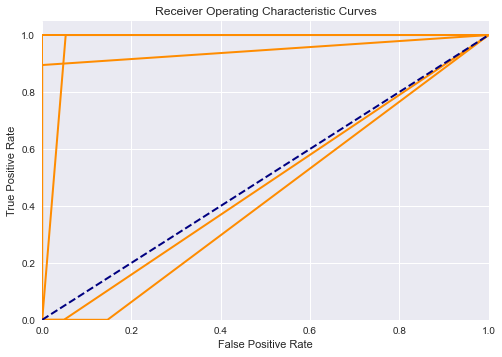

In [24]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [25]:
#Creating the variable for Knn object
RFClassifier = RandomForestClassifier(n_estimators = 100 ,criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
RFClassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred2 = RFClassifier.predict(X_test)
#Making the prediction on X_train
y_pred3 = RFClassifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
RF_Train = metrics.accuracy_score(y_train, y_pred3)*100
print("Random Forest model accuracy(in %) for Training:",RF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
RF_Test = metrics.accuracy_score(y_test, y_pred2)*100
print("Random Forest model accuracy(in %) for Testing:", RF_Test)

Random Forest model accuracy(in %) for Training: 100.0
Random Forest model accuracy(in %) for Testing: 97.67441860465115


ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 1.0
ROC-AUC for Class 3: 0.9947368421052631
ROC-AUC for Class 4: nan
ROC-AUC for Class 5: 0.8109756097560975
ROC-AUC for Class 6: 0.7621951219512195


C:\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


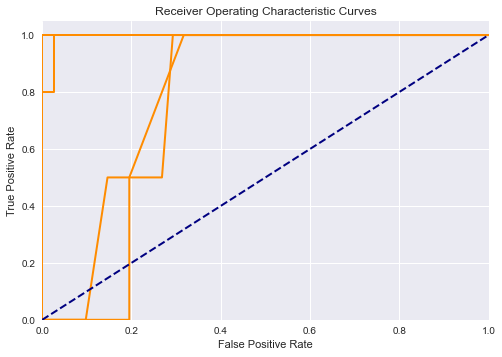

In [26]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = RFClassifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()